In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# 1. Importation et exploration du jeu de données

In [2]:
donnees= pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
type(donnees)

pandas.core.frame.DataFrame

In [4]:
donnees.shape

(299, 13)

In [5]:
donnees.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
donnees.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [7]:
# Nous divisons notre jeu de données en deux catégories pour faciliter l'analyse
variables_catégoriques =donnees[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
variables_continues = donnees[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

## Notes pour les données catégorielles :
Anémie : 0 signifie que la personne n'a pas d'anémie, 1 signifie qu'elle en a.
Diabète : 0 signifie que la personne n'a pas de diabète, 1 signifie qu'elle en a.
Hypertension artérielle : 0 signifie que la personne n'a pas d'hypertension artérielle, 1 signifie qu'elle en a. 
Tabagisme : 0 signifie que la personne ne fume pas, 1 signifie qu'elle fume.
Sexe : 0 pour femme, 1 pour homme.
Événement de décès : 0 signifie que l'insuffisance cardiaque n'est pas la cause du décès, 1 signifie qu'elle l'est.

In [8]:
# Vérifier le nombre de valeurs manquantes dans chaque colonne du jeu de données
donnees.isna().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
# Vérifier les valeurs nulles dans le jeu de données
donnees.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Obtenir les statistiques descriptives pour les variables continues
variables_continues.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [11]:
# Regrouper le jeu de données par la variable 'DEATH_EVENT' et compter le nombre d'occurrences dans chaque groupe
donnees.groupby('DEATH_EVENT').count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


## Remarque :
Étant donné que notre ensemble de données a été regroupé par 'DEATH_EVENT' nous constatons que l'ensemble de données est déséquilibré. Il y a un total de 96 décès, ce qui est inférieur à la moitié du total de personnes (203) qui n'ont pas connu de décès lié à une insuffisance cardiaque.

In [12]:
# Extraire les colonnes 'age' et 'plaquettes' du jeu de données
age = donnees[['age']]
plaquettes = donnees[['platelets']]

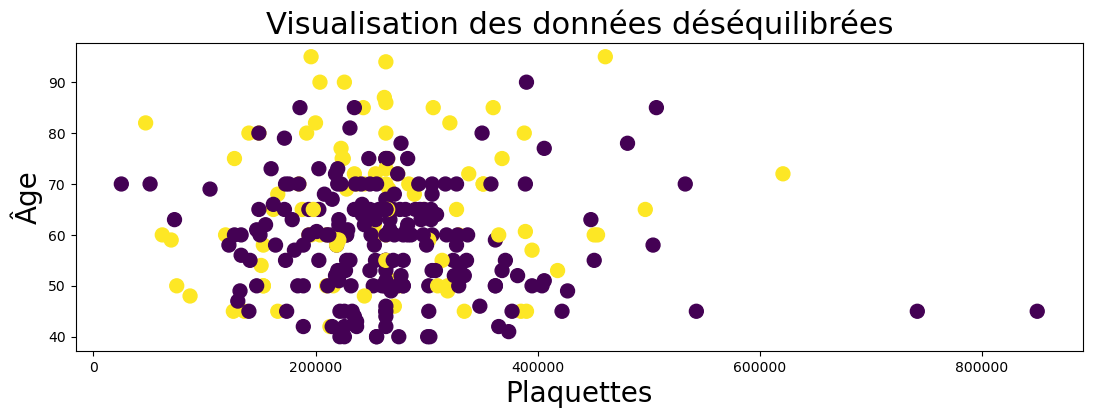

In [34]:
# Visualisation des données déséquilibrées avec un nuage de points, où les couleurs dépendent de 'DEATH_EVENT' (0 ou 1)

# Créer une figure de taille (13,7)
plt.figure(figsize=(13, 4))
# Diagramme de dispersion (scatter plot) avec 'platelets' en abscisse, 'age' en ordonnée, et coloration selon 'DEATH_EVENT'
plt.scatter(plaquettes, age, c=donnees['DEATH_EVENT'], s=100)
plt.xlabel("Plaquettes", fontsize=20)
plt.ylabel("Âge", fontsize=20)
plt.title("Visualisation des données déséquilibrées", fontsize=22)
plt.show()

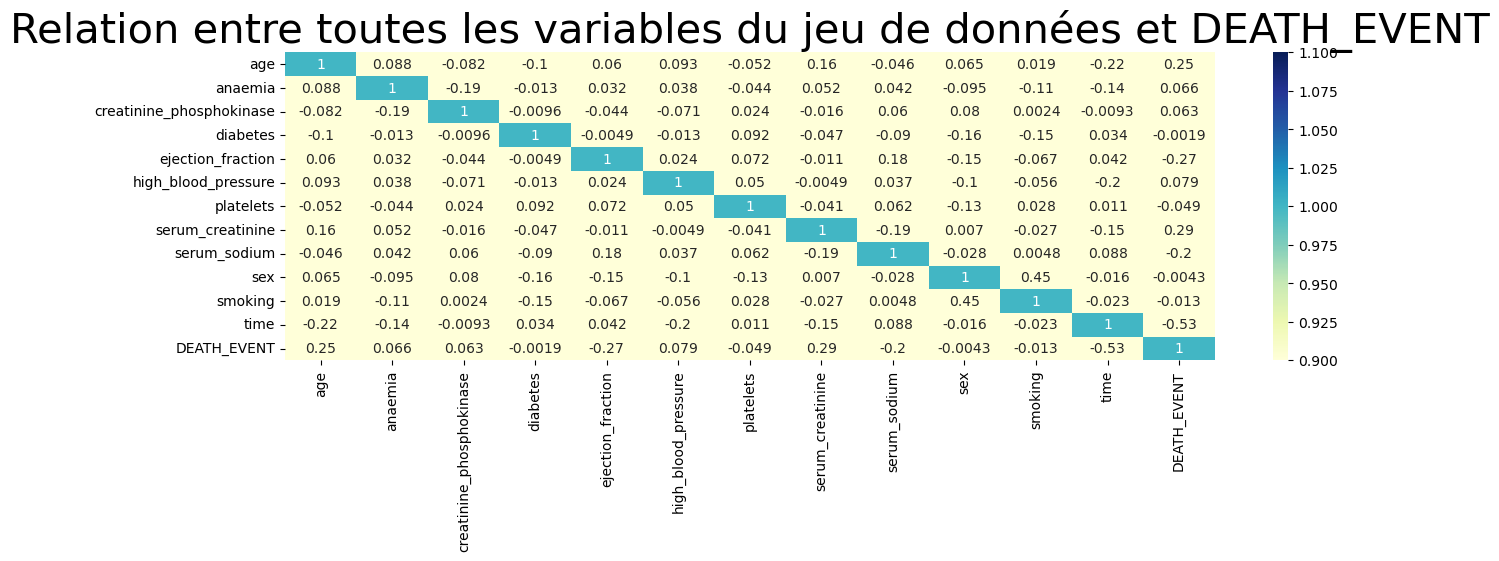

In [35]:
# Créer une figure de taille (15, 9)
plt.figure(figsize=(15, 4))

# Tracé d'une carte thermique (heatmap) de la corrélation entre toutes les variables du jeu de données et 'DEATH_EVENT'
sns.heatmap(donnees.corr(), vmin=1, vmax=1, cmap='YlGnBu', annot=True)
plt.title("Relation entre toutes les variables du jeu de données et DEATH_EVENT", fontsize=30)
plt.show()

## Note :
Nous remarquons qu’il existe une corrélation positive entre la créatinine DEATH_EVENT et sérique et l’âge. Nous avons également une corrélation négative entre le temps de DEATH_EVENT fourmis, la fraction d’éjection et le sodium sérum un peu.

# 2. Visualisation des données:

In [15]:
variables_catégoriques =donnees[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
variables_continues = donnees[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

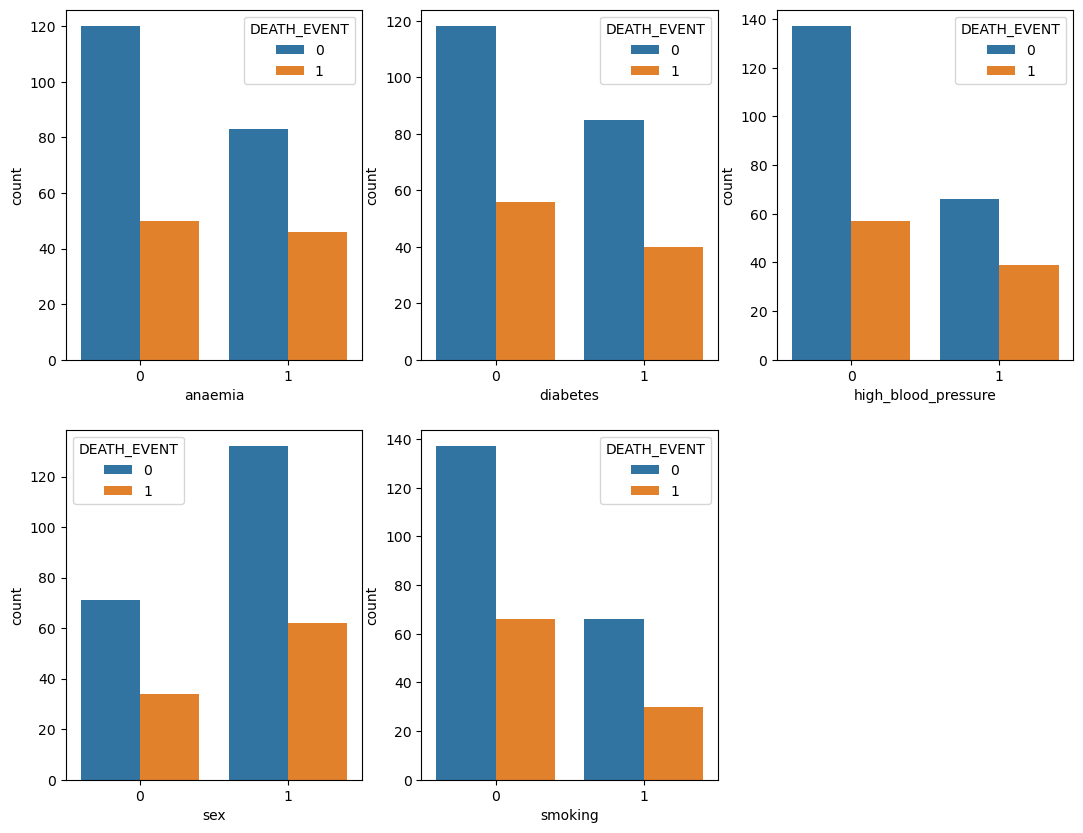

In [16]:
# Tracer l'impact des variables catégorielles sur l'événement de décès
plt.figure(figsize=(13, 10))
for i, cat in enumerate(variables_catégoriques):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=donnees, x=cat, hue='DEATH_EVENT')

plt.show()

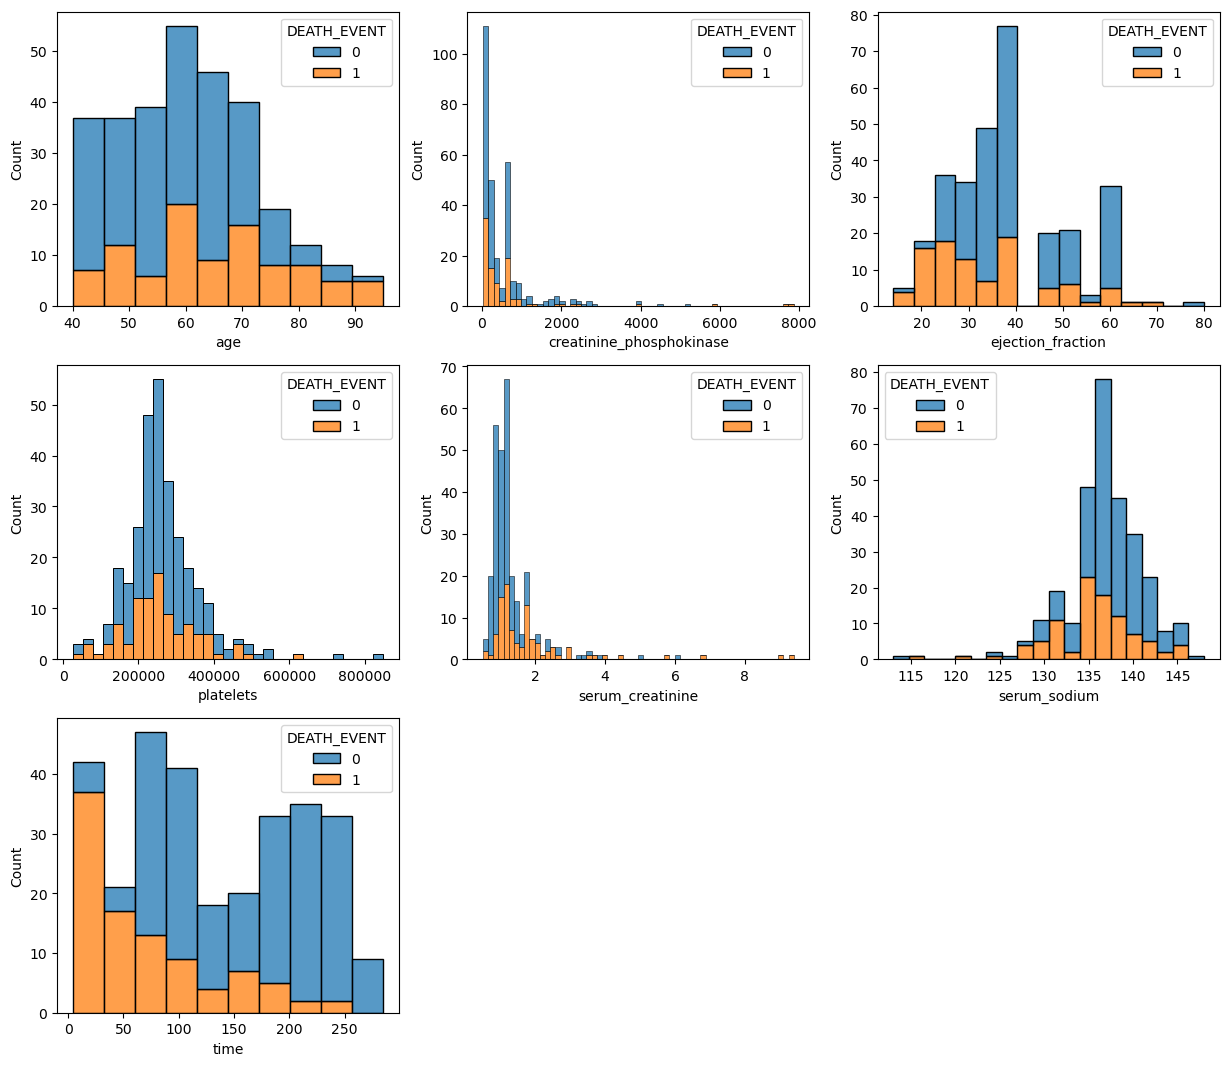

In [17]:
# Tracer l'impact des variables continues sur l'événement de décès
plt.figure(figsize=(15, 13))
for j, con in enumerate(variables_continues):
    plt.subplot(3, 3, j + 1)
    sns.histplot(data=donnees, x=con, hue="DEATH_EVENT", multiple="stack")

plt.show()

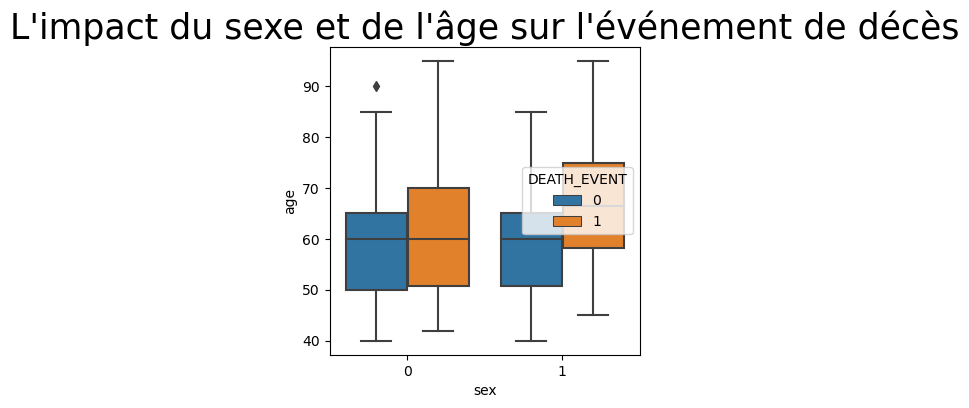

In [18]:
# Tracer l'impact du sexe et de l'âge sur l'événement de décès
plt.figure(figsize=(4, 4))
sns.boxplot(data=donnees, x='sex', y='age', hue='DEATH_EVENT')
plt.title("L'impact du sexe et de l'âge sur l'événement de décès", fontsize=25)
plt.show()

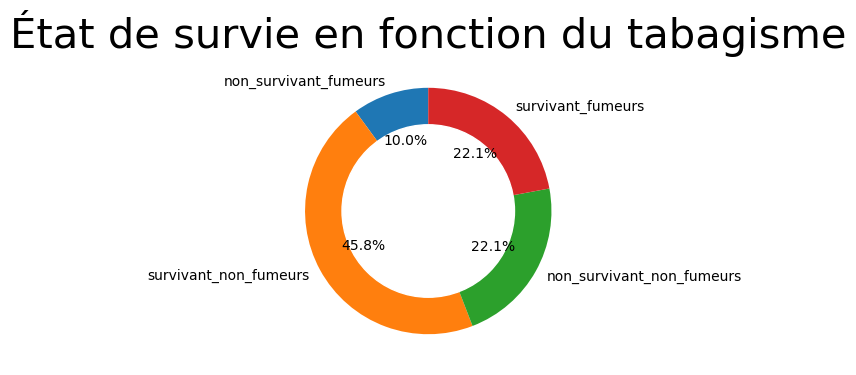

In [19]:
# Analyser l'état de survie en fonction du tabagisme et d'autres facteurs.

# Séparer les données en fumeurs et non-fumeurs
fumeurs = donnees[donnees['smoking'] == 1]
non_fumeurs = donnees[donnees['smoking'] == 0]

# Séparer les données en fonction de l'état de survie
non_survivant_fumeurs = fumeurs[fumeurs['DEATH_EVENT'] == 1]
survivant_non_fumeurs = non_fumeurs[non_fumeurs['DEATH_EVENT'] == 0]
non_survivant_non_fumeurs = non_fumeurs[non_fumeurs['DEATH_EVENT'] == 1]
survivant_fumeurs = fumeurs[fumeurs['DEATH_EVENT'] == 0]

# Créer une liste de données pour le diagramme circulaire
donnees_tabagisme = [len(non_survivant_fumeurs), len(survivant_non_fumeurs), len(non_survivant_non_fumeurs), len(survivant_fumeurs)]
labels_tabagisme = ['non_survivant_fumeurs', 'survivant_non_fumeurs', 'non_survivant_non_fumeurs', 'survivant_fumeurs']

# Créer un diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(donnees_tabagisme, labels=labels_tabagisme, autopct='%.1f%%', startangle=90)

# Ajouter un cercle blanc au centre pour un look plus propre
cercle = plt.Circle((0, 0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(cercle)
plt.title('État de survie en fonction du tabagisme', fontsize=30)
plt.show()

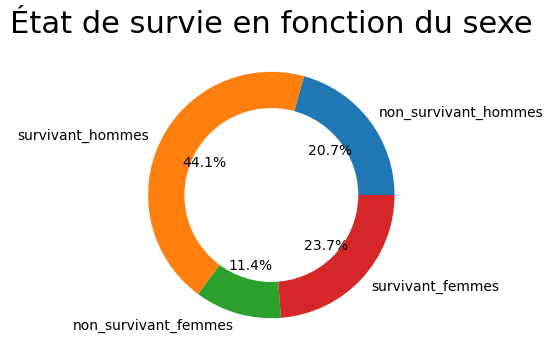

In [20]:
# Séparer les données en fonction du sexe
hommes = donnees[donnees["sex"] == 1]
femmes = donnees[donnees["sex"] == 0]

# Séparer les données en fonction de l'état de survie pour chaque sexe
non_survivant_hommes = hommes[hommes["DEATH_EVENT"] == 1]
survivant_hommes = hommes[hommes["DEATH_EVENT"] == 0]
non_survivant_femmes = femmes[femmes["DEATH_EVENT"] == 1]
survivant_femmes = femmes[femmes["DEATH_EVENT"] == 0]

# Créer une liste de données pour le diagramme circulaire
donnees_sexe = [len(non_survivant_hommes), len(survivant_hommes), len(non_survivant_femmes), len(survivant_femmes)]
labels_sexe = ["non_survivant_hommes", "survivant_hommes", "non_survivant_femmes", "survivant_femmes"]

# Créer un diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(donnees_sexe, labels=labels_sexe, autopct='%.1f%%')

# Ajouter un cercle blanc au centre pour un look plus propre
cercle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(cercle)
plt.title("État de survie en fonction du sexe", fontsize=22)
plt.show()

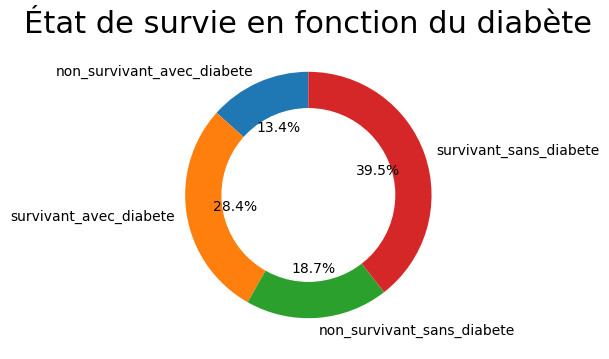

In [21]:
# Analyse de l'état de survie en fonction du diabète

# Filtrer les données pour les patients avec diabète et sans diabète
avec_diabete = donnees[donnees["diabetes"] == 1]
sans_diabete = donnees[donnees["diabetes"] == 0]

# Filtrer les données en fonction de l'état de survie pour chaque groupe de diabète
non_survivant_avec_diabete = avec_diabete[avec_diabete["DEATH_EVENT"] == 1]
survivant_avec_diabete = avec_diabete[avec_diabete["DEATH_EVENT"] == 0]

non_survivant_sans_diabete = sans_diabete[sans_diabete["DEATH_EVENT"] == 1]
survivant_sans_diabete = sans_diabete[sans_diabete["DEATH_EVENT"] == 0]

# Créer une liste de données pour le diagramme circulaire
donnees_diabete = [len(non_survivant_avec_diabete), len(survivant_avec_diabete),len(non_survivant_sans_diabete), len(survivant_sans_diabete)]
labels_diabete = ["non_survivant_avec_diabete", "survivant_avec_diabete","non_survivant_sans_diabete", "survivant_sans_diabete"]

# Créer un diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(donnees_diabete, labels=labels_diabete, autopct='%.1f%%', startangle=90)
cercle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(cercle)
plt.title("État de survie en fonction du diabète", fontsize=22)
plt.show()

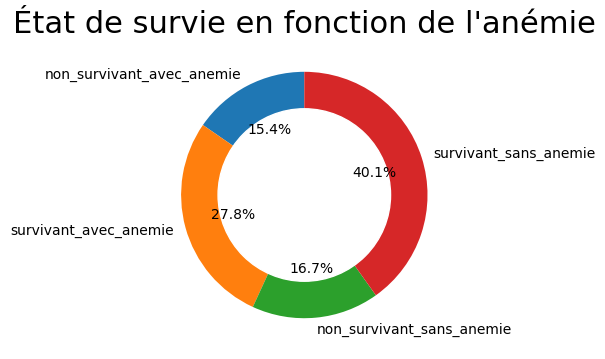

In [22]:
# Analyse de l'état de survie en fonction de l'anémie

# Filtrer les données pour les patients avec anémie et sans anémie
avec_anemie = donnees[donnees["anaemia"] == 1]
sans_anemie = donnees[donnees["anaemia"] == 0]

# Filtrer les données en fonction de l'état de survie pour chaque groupe d'anémie
non_survivant_avec_anemie = avec_anemie[avec_anemie["DEATH_EVENT"] == 1]
survivant_avec_anemie = avec_anemie[avec_anemie["DEATH_EVENT"] == 0]

non_survivant_sans_anemie = sans_anemie[sans_anemie["DEATH_EVENT"] == 1]
survivant_sans_anemie = sans_anemie[sans_anemie["DEATH_EVENT"] == 0]

# Créer une liste de données pour le diagramme circulaire
donnees_anemie = [len(non_survivant_avec_anemie), len(survivant_avec_anemie),len(non_survivant_sans_anemie), len(survivant_sans_anemie)]

# Les étiquettes 
etiquettes_anemie = ["non_survivant_avec_anemie", "survivant_avec_anemie", "non_survivant_sans_anemie", "survivant_sans_anemie"]

# Créer un diagramme circulaire
plt.figure(figsize=(4, 4))
plt.pie(donnees_anemie, labels=etiquettes_anemie, autopct='%.1f%%', startangle=90)

# Ajouter un cercle blanc au centre pour un look plus propre
cercle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(cercle)
plt.title("État de survie en fonction de l'anémie", fontsize=22)
plt.show()

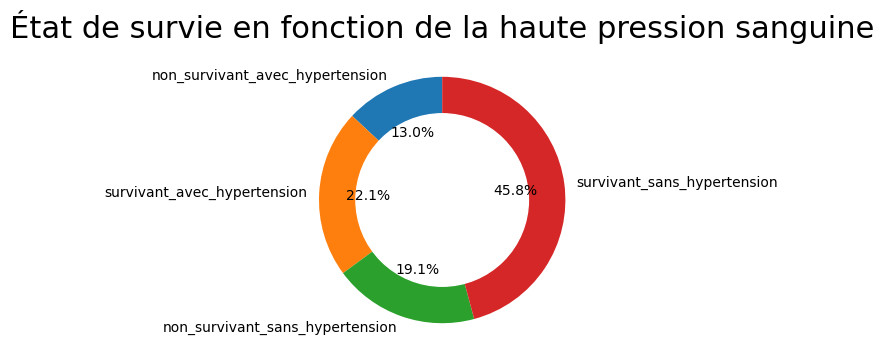

In [23]:
# Analyse de l'état de survie en fonction de la haute pression sanguine

# Filtrer les données pour les patients avec et sans haute pression sanguine
avec_hypertension = donnees[donnees["high_blood_pressure"] == 1]
sans_hypertension = donnees[donnees["high_blood_pressure"] == 0]

# Filtrer les données en fonction de l'état de survie pour chaque groupe de haute pression sanguine
non_survivant_avec_hypertension = avec_hypertension[avec_hypertension["DEATH_EVENT"] == 1]
survivant_avec_hypertension = avec_hypertension[avec_hypertension["DEATH_EVENT"] == 0]

non_survivant_sans_hypertension = sans_hypertension[sans_hypertension["DEATH_EVENT"] == 1]
survivant_sans_hypertension = sans_hypertension[sans_hypertension["DEATH_EVENT"] == 0]

# Créer une liste de données pour le diagramme circulaire
donnees_hypertension = [len(non_survivant_avec_hypertension), len(survivant_avec_hypertension), len(non_survivant_sans_hypertension), len(survivant_sans_hypertension)]

etiquettes_hypertension = ["non_survivant_avec_hypertension", "survivant_avec_hypertension", "non_survivant_sans_hypertension", "survivant_sans_hypertension"]
plt.figure(figsize=(4, 4))
plt.pie(donnees_hypertension, labels=etiquettes_hypertension, autopct='%.1f%%', startangle=90)
cercle = plt.Circle((0, 0), 0.7, color="white")
p = plt.gcf()
p.gca().add_artist(cercle)
plt.title("État de survie en fonction de la haute pression sanguine", fontsize=22)
plt.show()

# 3. Modélisation des données et prédiction en utilisant des données continues

In [24]:
# Séparation des données en variables indépendantes (X) et dépendante (y)
x = donnees[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = donnees['DEATH_EVENT']

In [25]:
# Séparation des données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [26]:
# Créer une instance de StandardScaler
scaler = StandardScaler()
# Mise à l'échelle des données d'entraînement
x_train_scaled = scaler.fit_transform(x_train)
# Mise à l'échelle des données de test en utilisant les paramètres de l'entraînement
x_test_scaled = scaler.transform(x_test)

In [27]:
# Création d'une liste pour enregistrer toutes les valeurs d'exactitude de différents modèles pour la comparaison à l'aide d'un graphique à barres
resultats_exactitude = []

## 3.1 Régression logistique

In [28]:
# Création d'une instance du modèle de régression logistique
modele_regression_logistique = LogisticRegression()

# Entraînement du modèle
modele_regression_logistique.fit(x_train_scaled, y_train)

# Prédiction sur l'ensemble de test
predictions_logistique = modele_regression_logistique.predict(x_test_scaled)

# Calcul de l'exactitude du modèle et ajout à la liste
exactitude_logistique = (round(accuracy_score(predictions_logistique, y_test), 4) * 100)
resultats_exactitude.append(exactitude_logistique)

## 3.2 Machine à vecteurs de support (SVM)

In [29]:
# Création d'une instance du modèle SVM
modele_svm = SVC()

# Entraînement du modèle
modele_svm.fit(x_train_scaled, y_train)

# Prédiction sur l'ensemble de test
predictions_svm = modele_svm.predict(x_test_scaled)

# Calcul de l'exactitude du modèle et ajout à la liste
exactitude_svm = (round(accuracy_score(predictions_svm, y_test), 4) * 100)
resultats_exactitude.append(exactitude_svm)

## 3.3 Classificateur d'arbre de décision

In [30]:
# Initialisation du modèle d'arbre de décision
modele_arbre_decision = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Entraînement du modèle
modele_arbre_decision.fit(x_train_scaled, y_train)

# Prédiction sur l'ensemble de test
predictions_arbre_decision = modele_arbre_decision.predict(x_test_scaled)

# Calcul de l'exactitude du modèle et ajout à la liste
exactitude_arbre_decision = (round(accuracy_score(predictions_arbre_decision, y_test), 4) * 100)
resultats_exactitude.append(exactitude_arbre_decision)

## 3.4 Classificateur de forêt aléatoire

In [31]:
#Initialisation du modèle de forêt aléatoire
modele_foret_aleatoire = RandomForestClassifier()

# Entraînement du modèle
modele_foret_aleatoire.fit(x_train_scaled, y_train)

# Prédiction sur l'ensemble de test
predictions_foret_aleatoire = modele_foret_aleatoire.predict(x_test_scaled)

# Calcul de l'exactitude du modèle et ajout à la liste
exactitude_foret_aleatoire = (round(accuracy_score(predictions_foret_aleatoire, y_test), 4) * 100)
resultats_exactitude.append(exactitude_foret_aleatoire)

In [32]:
resultats_exactitude

[87.78, 84.44, 88.89, 87.78]

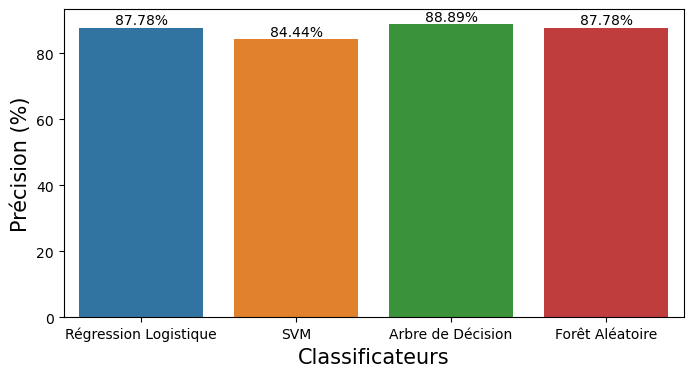

In [33]:
# Liste des noms des modèles
modeles = ["Régression Logistique", "SVM", "Arbre de Décision", "Forêt Aléatoire"]

# Tracé du graphique à barres
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=modeles, y=resultats_exactitude)

# Ajout des étiquettes et du titre
plt.xlabel("Classificateurs", fontsize=15)
plt.ylabel("Précision (%)", fontsize=15)

# Ajout des annotations au-dessus des barres
for p in ax.patches:
    largeur = p.get_width()
    hauteur = p.get_height()
    x, y = p.get_x(), p.get_y()
    ax.annotate(f"{hauteur:.2f}%", (x + largeur / 2, y + hauteur * 1.01), ha="center")

# Affichage du graphique
plt.show()